<a href="https://colab.research.google.com/github/putribuana/EpidermAI-SkinDetection/blob/main/EpidermAI-Finalcheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **EpidermAI**
<img src="https://drive.google.com/uc?id=1i689LY80fqhpuPC9Ms7iDiPUHY4FRqY3" alt="epidermai logo" width="250" height="250">

> Overview <br>

*This notebook for build model of EpidermAI skin disease classification on Capstone Project **Bangkit Academy 2023**.*<br><br>
**EpidermAI** is an AI-based skin disease detection application to quickly and accurately identify and diagnose skin conditions, enabling users to get practical medical information and advice.<br>
Our mission is to helping skin disease patients to find out the type of their disease so they can recover without needing to go to the hospital again.


---

> Dataset <br>

Our project collects dataset from [Kaggle](https://kaggle.com). <br>
1. ISIC Dataset <br>
Contain 25.3k images belonging to 8 class.<br>
Source: [ISIC](https://https://www.kaggle.com/datasets/riyaelizashaju/isic-skin-disease-image-dataset-labelled)<br>
2. Dermnet Dataset <br>
Contain 19.6k images belonging to 23 class.<br>
Source: [Dermnet](https://https://www.kaggle.com/datasets/shubhamgoel27/dermnet)

From the two datasets above, we merged it out and eliminated several class. Finally, our dataset contain 10.3k images and belonging to 10 class of skin disease i.e.
*   Acne and Rosacea
*   Benign Keratosis
*   Chickenpox
*   Dermatofibroma
*   Distal Subungal Onychomycosis
*   Measles
*   Melanocytic Nevus
*   Melanoma
*   Monkeypox
*   Vascular Lesion <br>

Our dataset can be found here [EpidermAI Dataset](https://https://www.kaggle.com/datasets/dbd572ee679b34c349873c2bff8dde58b8cd927865e3da5e365bfb201b770789)



---



> Model <br>

Our project uses pre-trained model from **MobileNetV2** that is a convolutional neural network that have 53 layers deep.

```
# Adding some layers
GlobalAveragePooling2D()
Dense = 128
BatchNormalization()
Dropout = 0.2
Dense = 10
```
The result : <br>

| Parameter           | Value |
|---------------------|-------|
| Train Accuracy      | 0.85  |
| Train Loss          | 0.40  |
| Validation Accuracy | 0.81  |
| Validation Loss     | 0.60  |

---


Copyright &copy; 2023 EpidermAI.

# Import & Install Module

In [ ]:
# Install numpy indexed
!pip install numpy-indexed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import re
import gc
import cv2
import shutil
import pathlib
import sklearn
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy_indexed as npi
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from tensorflow import keras
from tensorflow import lite
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from keras import Sequential
from keras.applications import MobileNetV2
from keras.regularizers import l2
from keras.layers import (Dense, Flatten, Conv2D,
                          MaxPooling2D, AveragePooling2D, Dropout,
                          BatchNormalization, GlobalAveragePooling2D)
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from google.colab import drive

# Initialization Variables

In [ ]:
# define the variable will be used
IMAGE_SIZE = 128
BATCH_SIZE = 10
EPOCHS = 50
train_ratio = 0.85
validation_ratio = 0.10
test_ratio = 0.05
data = []
label = []

# Load Dataset

In [ ]:
# store name of dataset in directory to class_before
class_before = np.sort(os.listdir('/content/gdrive/MyDrive/Capstone/Dataset/isic-x-dermnet'))

# names as label
# images as data
for class_total in class_before:
    print(f'Name: {class_total}')
    for file_total in tqdm(os.listdir('/content/gdrive/MyDrive/Capstone/Dataset/isic-x-dermnet/'+class_total)):
            # define names as label of dataset
            names = class_before
            names = np.where(names != class_total, 0.0, names)
            names = np.where(names == class_total, 1.0, names)

            # define images as data
            image_file = '/content/gdrive/MyDrive/Capstone/Dataset/isic-x-dermnet/'+class_total+'/'+ file_total

            # append image_file to data (array)
            data.append(np.asarray(Image.open(image_file).resize((IMAGE_SIZE, IMAGE_SIZE))))

            # append name to label
            label.append(names)

Name: Acne and Rosacea Photos


100%|██████████| 406/406 [00:13<00:00, 30.58it/s]


Name: Benign keratosis


100%|██████████| 2624/2624 [03:53<00:00, 11.26it/s]


Name: Chickenpox


100%|██████████| 97/97 [01:01<00:00,  1.57it/s]


Name: Dermatofibroma


100%|██████████| 370/370 [00:29<00:00, 12.55it/s]


Name: Distal Subungual Onychomycosis


100%|██████████| 105/105 [00:03<00:00, 31.12it/s]


Name: Measles


100%|██████████| 83/83 [00:55<00:00,  1.48it/s]


Name: Melanocytic nevus


100%|██████████| 1500/1500 [01:24<00:00, 17.82it/s]


Name: Melanoma


100%|██████████| 4522/4522 [07:04<00:00, 10.65it/s]


Name: Monkeypox


100%|██████████| 269/269 [00:05<00:00, 48.77it/s] 


Name: Vascular lesion


100%|██████████| 348/348 [00:22<00:00, 15.70it/s]


In [ ]:
# normalize data & change data type to float
data = np.array(data, dtype='float32') / 255
label = np.array(label, dtype='float32')

# Plotting Data
Showing image in each class

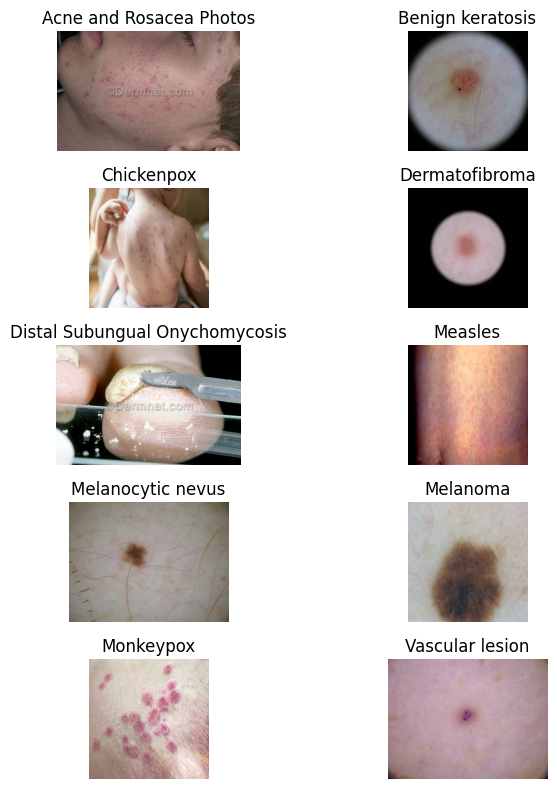

In [ ]:
# Takes the class name from the folder name
source_dir = '/content/gdrive/MyDrive/Capstone/Dataset/isic-x-dermnet'
class_names = sorted(os.listdir(source_dir))

# Plot some sample images from the data train
plt.figure(figsize=(8, 8))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(source_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    image = plt.imread(image_path)

    plt.subplot(5, 2, i+1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Split Dataset

Size of splitting dataset:<br>
*   Train = 85% of dataset
*   Validation = 10% of dataset
*   Test = 5% of dataset



In [ ]:
# Data -> x_train & x_test
# Label -> y_train & y_test
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 1 - train_ratio, random_state=123)

In [ ]:
# x_test -> x_val & x_test
# y_test -> y_val & y_test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio / (test_ratio + validation_ratio))

# Create Pre-Trained Model (MobileNetV2)

Pre-trained model using MobileNetV2

In [ ]:
mobilenet = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)

9406464/9406464 [==============================] - 1s 0us/step


Freeze:

In [ ]:
for layer in mobilenet.layers:
    layer.trainable = True

In [ ]:
# look at the architecture of MobileNetV2
mobilenet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

# Create Model

In [ ]:
def create_model():
    model = Sequential([
        mobilenet,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu',
              kernel_regularizer=l2(0.0001),
              bias_regularizer=l2(0.0001),
              activity_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')
    ])

    return model

In [ ]:
model = create_model()

In [ ]:
# compile the model
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
# look the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

# Preprocessing

In [ ]:
# add augmentation to dataset
datagen = ImageDataGenerator(
    rotation_range=90,
    shear_range = 10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Adjust Learning Rate

In [ ]:
# custom callbacks
# if validation accuracy >= 80% training will be stopped
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.80:
            self.model.stop_training = True

In [ ]:
callbacks = CustomCallback()

In [ ]:
# add learning rate reduction
# monitor on validation accuracy, if val acc doesn't improve in 5 epochs learning rate will reduced
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=5,
                                 verbose=1,
                                 factor=0.5,
                                 min_lr=0.00001)

In [ ]:
# add early stopping
lr_es = EarlyStopping(patience=20,
                      monitor='val_accuracy',
                      restore_best_weights=True)

# Train The Model

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                    validation_data = (x_val, y_val),
                    epochs = EPOCHS,
                    steps_per_epoch = x_train.shape[0] // BATCH_SIZE,
                    callbacks=[lr_reduction, lr_es, callbacks])

Epoch 1/50
877/877 [==============================] - 742s 838ms/step - loss: 1.7133 - accuracy: 0.5059 - val_loss: 2.9864 - val_accuracy: 0.2926 - lr: 1.0000e-04
Epoch 2/50
877/877 [==============================] - 686s 783ms/step - loss: 1.1933 - accuracy: 0.6369 - val_loss: 1.5226 - val_accuracy: 0.5804 - lr: 1.0000e-04
Epoch 3/50
877/877 [==============================] - 662s 755ms/step - loss: 1.0265 - accuracy: 0.6755 - val_loss: 1.2729 - val_accuracy: 0.6831 - lr: 1.0000e-04
Epoch 4/50
877/877 [==============================] - 691s 788ms/step - loss: 0.9158 - accuracy: 0.6979 - val_loss: 1.4574 - val_accuracy: 0.6221 - lr: 1.0000e-04
Epoch 5/50
877/877 [==============================] - 652s 744ms/step - loss: 0.8424 - accuracy: 0.7116 - val_loss: 0.9366 - val_accuracy: 0.7297 - lr: 1.0000e-04
Epoch 6/50
877/877 [==============================] - 663s 757ms/step - loss: 0.7764 - accuracy: 0.7241 - val_loss: 0.7935 - val_accuracy: 0.7355 - lr: 1.0000e-04
Epoch 7/50
877/877 [==

Look the training history:

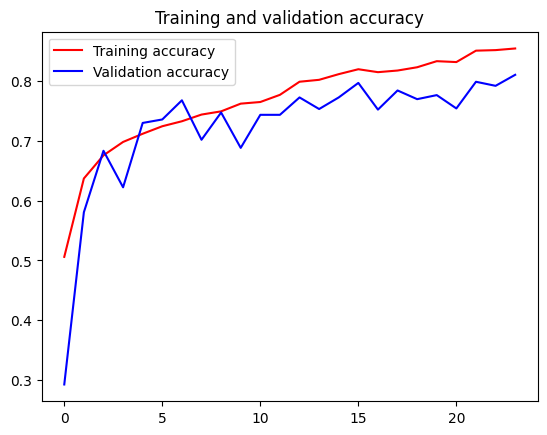

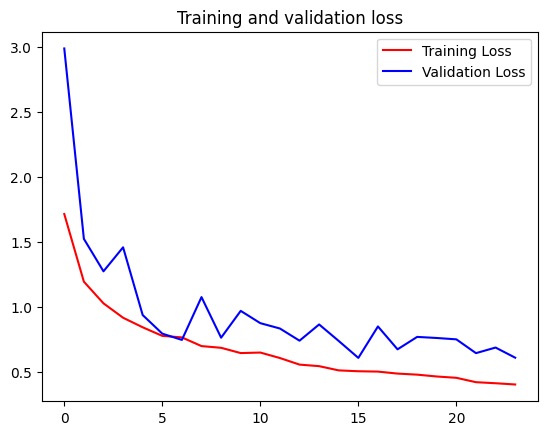

In [ ]:
# define accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plotting accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# plotting loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# show plot
plt.show()

# Evaluation & Prediction

In [ ]:
# look the class of dataset
class_before

array(['Acne and Rosacea Photos', 'Benign keratosis', 'Chickenpox',
       'Dermatofibroma', 'Distal Subungual Onychomycosis', 'Measles',
       'Melanocytic nevus', 'Melanoma', 'Monkeypox', 'Vascular lesion'],
      dtype='<U30')

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=class_before))

17/17 [==============================] - 12s 428ms/step
                                precision    recall  f1-score   support

       Acne and Rosacea Photos       0.79      1.00      0.88        11
              Benign keratosis       0.83      0.71      0.76       139
                    Chickenpox       0.44      0.80      0.57         5
                Dermatofibroma       0.54      0.88      0.67        16
Distal Subungual Onychomycosis       1.00      1.00      1.00         2
                       Measles       0.36      0.80      0.50         5
             Melanocytic nevus       0.67      0.87      0.76        69
                      Melanoma       0.90      0.84      0.87       238
                     Monkeypox       0.93      0.74      0.82        19
               Vascular lesion       1.00      0.92      0.96        13

                      accuracy                           0.81       517
                     macro avg       0.75      0.85      0.78       517
      

# Save Model

In [ ]:
# save the model
export_dir = 'epidermai_final_model'

tf.saved_model.save(model, export_dir)

# Convert Model to TFLite

In [ ]:
# convert saved model API
converter = lite.TFLiteConverter.from_saved_model(export_dir)

# set the optimizations
converter.optimizations = [lite.Optimize.DEFAULT]

# invoke to generate the TFLite model
tflite_model = converter.convert()

In [ ]:
# create tflite file
tflite_model_file = pathlib.Path('./final_model.tflite')
tflite_model_file.write_bytes(tflite_model)

2674616

# Archiving

In [ ]:
# create archive
os.makedirs('/content/archive')

# move file to archive
shutil.move('/content/final_model.tflite', '/content/archive/final_model.tflite')
shutil.move('/content/epidermai_final_model', '/content/archive/')

'/content/archive/epidermai_final_model'

In [ ]:
# zipping
zip_filename = "/content/epidermai_final.zip"
zip_file = zipfile.ZipFile(zip_filename, "w")

source_dir = '/content/archive'

for root, dirs, files in os.walk(source_dir):
    for file in files:
        file_path = os.path.join(root, file)
        arcname = os.path.relpath(file_path, source_dir)
        zip_file.write(file_path, arcname=arcname)

zip_file.close()

In [ ]:
print('DONE!')

DONE!
